In [28]:
import pandas as pd 
import matplotlib.pyplot as plt
from algorithm import FedAc
from utils import load 

%matplotlib inline

In [2]:
model = FedAc(
    dataset = "a9a.txt",
    outfile = "data/examples.hdf5"
)

In [7]:
# FedAc Naive (version 0)
model.train(
    version = 0,
    key = "a9a_fedac_0",
    eta = 0.001,
    decay = 0.01,
    batchsize = 4,
    M = 4,
    K = 2,
    T = 4096,
    record = 512,
)

{'method': 0, 'batchsize': 4, 'seed': None, 'eta': 0.001, 'decay': 0.01, 'M': 4, 'K': 2, 'T': 4096, 'record': 512, 'gamma': 0.31622776601683794, 'alpha': 316.2277660168379, 'beta': 317.2277660168379}
Epoch: 0      | Loss: 1.3274
Epoch: 512    | Loss: 0.5279
Epoch: 1024   | Loss: 0.3874
Epoch: 1536   | Loss: 0.3751
Epoch: 2048   | Loss: 0.3818
Epoch: 2560   | Loss: 0.3742
Epoch: 3072   | Loss: 0.3760
Epoch: 3584   | Loss: 0.3748
Epoch: 4096   | Loss: 0.3749


In [9]:
# FedAc-I (version 1)
model.train(
    version = 1,
    key = "a9a_fedac_1",
    eta = 0.001,
    decay = 0.01,
    batchsize = 4,
    M = 4,
    K = 2,
    T = 4096,
    record = 512
)

{'method': 1, 'batchsize': 4, 'seed': None, 'eta': 0.001, 'decay': 0.01, 'M': 4, 'K': 2, 'T': 4096, 'record': 512, 'gamma': 0.22360679774997896, 'alpha': 447.2135954999579, 'beta': 448.2135954999579}
Epoch: 0      | Loss: 1.3274
Epoch: 512    | Loss: 0.6680
Epoch: 1024   | Loss: 0.4314
Epoch: 1536   | Loss: 0.3825
Epoch: 2048   | Loss: 0.3759
Epoch: 2560   | Loss: 0.3739
Epoch: 3072   | Loss: 0.3745
Epoch: 3584   | Loss: 0.3784
Epoch: 4096   | Loss: 0.3759


In [8]:
# FedAc-II (version 2)
model.train(
    version = 2,
    key = "a9a_fedac_2",
    eta = 0.001,
    decay = 0.01,
    batchsize = 4,
    M = 4,
    K = 2,
    T = 4096,
    record = 512
)

{'method': 2, 'batchsize': 4, 'seed': None, 'eta': 0.001, 'decay': 0.01, 'M': 4, 'K': 2, 'T': 4096, 'record': 512, 'gamma': 0.22360679774997896, 'alpha': 670.3203932499368, 'beta': 1342.643774605451}
Epoch: 0      | Loss: 1.3274
Epoch: 512    | Loss: 0.9016
Epoch: 1024   | Loss: 0.5859
Epoch: 1536   | Loss: 0.4433
Epoch: 2048   | Loss: 0.3934
Epoch: 2560   | Loss: 0.3785
Epoch: 3072   | Loss: 0.3742
Epoch: 3584   | Loss: 0.3751
Epoch: 4096   | Loss: 0.3737


In [20]:
V0_data, V0_params = load("data/examples.hdf5", "a9a_fedac_0")
V1_data, V1_params = load("data/examples.hdf5", "a9a_fedac_1")
V2_data, V2_params = load("data/examples.hdf5", "a9a_fedac_2")

data = pd.concat({"FedAc-Naive": V0_data, "FedAc-I": V1_data, "FedAc-II": V2_data}, axis = 1)
data

,FedAc-Naive,FedAc-I,FedAc-II
0,1.327368,1.327368,1.327368
512,0.527949,0.668045,0.901601
1024,0.387362,0.431404,0.585875
1536,0.375126,0.382501,0.443329
2048,0.381752,0.375939,0.393436
2560,0.374167,0.373935,0.378501
3072,0.376020,0.374456,0.374188
3584,0.374831,0.378376,0.375101
4096,0.374887,0.375880,0.373687


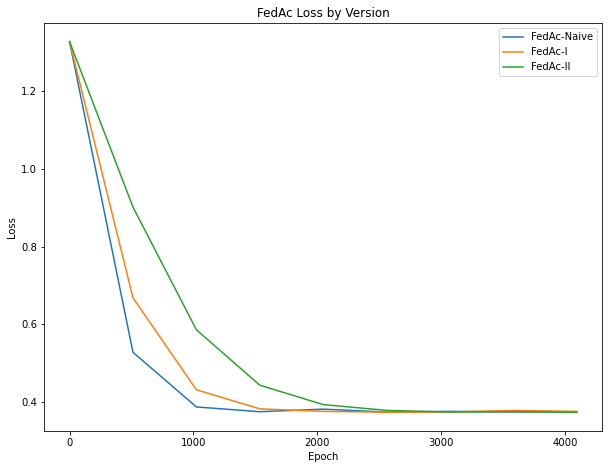

In [29]:
data.plot(xlabel = "Epoch", ylabel = "Loss", title = "FedAc Loss by Version", figsize = (10, 7.5))
plt.show()

In [35]:
for i, k in zip(["FedAc-Naive", "FedAc-I", "FedAc-II"], [V0_params, V1_params, V2_params]):
    print(f"{i} | Gamma: {k['gamma']:.3f} | Alpha: {k['alpha']:.3f} | Beta: {k['beta']:.3f}")

FedAc-Naive | Gamma: 0.316 | Alpha: 316.228 | Beta: 317.228
FedAc-I | Gamma: 0.224 | Alpha: 447.214 | Beta: 448.214
FedAc-II | Gamma: 0.224 | Alpha: 670.320 | Beta: 1342.644
